<a href="https://colab.research.google.com/github/umang66782/Plaksha/blob/main/Scraping_covid19data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# stretch Jupyter coding blocks to fit screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) 
# if 100% it would fit the screen


In [ ]:
import requests # The requests library is an 
# HTTP library for getting and posting content etc.

import bs4 as bs # BeautifulSoup4 is a Python library 
# for pulling data out of HTML and XML code.
# We can query markup languages for specific content

import pandas as pd

In [ ]:
source = requests.get("https://en.wikipedia.org/wiki/COVID-19_pandemic_by_country_and_territory") 
# a GET request will download the HTML webpage.

In [ ]:
source

<Response [200]>

In [ ]:
print(source.content)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>COVID-19 pandemic by country and territory - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"X-II@gpAICoAAGEK73gAAABT","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"COVID-19_pandemic_by_country_and_territory","wgTitle":"COVID-19 pandemic by country and territory","wgCurRevisionId":998033252,"wgRevisionId":998033252,"wgArticleId":62938755,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from December 2020","All articles con

In [ ]:
# Convert source.content to a beautifulsoup object 
# beautifulsoup can parse (extract specific information) HTML code

soup = bs.BeautifulSoup(source.content, features='html.parser') 
# we pass in the source content
# features specifies what type of code we are parsing, 
# here 'html.parser' specifies that we want beautiful soup to parse HTML code

In [ ]:
country = list()
cases =  list()
deaths = list()
recoveries = list()

for countryinstance in soup.find(id="covid-19-pandemic-data").text.split("World[e]")[1].split('\n\n\n')[1:-4]:
    #print(countryinstance.split("\n")[0])
    country.append(countryinstance.split('\n\n')[1])
    cases.append(countryinstance.split('\n\n')[2])
    deaths.append(countryinstance.split('\n\n')[3])
    recoveries.append(countryinstance.split('\n\n')[4])


In [ ]:
data  = {'Country': country,'Cases':cases,'Deaths':deaths,'Recoveries':recoveries}
#df.style.set_caption("Hello World")
data = pd.DataFrame(data)


In [ ]:
data['Cases'] =  pd.to_numeric(data['Cases'].str.replace('\W', ''),errors='coerce').fillna(0).astype(int)
data['Deaths'] =  pd.to_numeric(data['Deaths'].str.replace('\W', ''),errors='coerce').fillna(0).astype(int)
data['Recoveries'] =  pd.to_numeric(data['Recoveries'].str.replace('\W', ''),errors='coerce').fillna(0).astype(int)
data['Cases/Deaths'] =  data['Cases']/data['Deaths']


data['Country'] = data['Country'].str.replace(r"\[.*\]","")

In [ ]:
data.drop(data.loc[data['Deaths']==0].index, inplace=True)
data

,Country,Cases,Deaths,Recoveries,Cases/Deaths
0,United States,20596260,353309,9223561,58.295317
1,India,10305788,149218,9906387,69.065314
2,Brazil,7716405,195742,6769420,39.421305
3,Russia,3236787,58506,2618882,55.324018
4,United Kingdom,2654779,75024,0,35.385730
...,...,...,...,...,...
211,Fiji,49,2,44,24.500000
216,Sahrawi Arab DR,31,3,27,10.333333
225,Montserrat,13,1,12,13.000000
226,MS Zaandam,13,4,0,3.250000


In [ ]:
data.sort_values('Cases/Deaths',ascending=False)[0:20]

,Country,Cases,Deaths,Recoveries,Cases/Deaths
88,Singapore,58662,29,58476,2022.827586
177,Mongolia,1215,1,830,1215.000000
179,USS Theodore Roosevelt,1102,1,751,1102.000000
60,Qatar,144437,245,141808,589.538776
176,Eritrea,1320,3,676,440.000000
185,Burundi,760,2,687,380.000000
45,United Arab Emirates,213231,679,189709,314.036819
123,Botswana,12340,40,11627,308.500000
164,Gibraltar,2406,8,1447,300.750000
117,Maldives,13804,48,13149,287.583333



**comment on the result, i.e. write what the cases per death number indicates for countries with a high value and countries with a low value?   t**

high value indicates the country holds better medical facility but fails to control the spread and vice versa

In [ ]:
import pandas as pd

url="https://covid.ourworldindata.org/data/ecdc/total_deaths.csv"
cd=pd.read_csv(url)

In [ ]:
cd

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-11-25,1410788.0,1725.0,735.0,2309.0,76.0,337.0,NaN,4.0,37432.0,2040.0,45.0,907.0,2408.0,1194.0,163.0,340.0,6448.0,7.0,1112.0,16113.0,125.0,43.0,9.0,NaN,8928.0,3.0,2394.0,31.0,170115.0,1.0,3.0,3226.0,68.0,1.0,NaN,436.0,11618.0,104.0,2.0,...,NaN,113.0,21083.0,513.0,60.0,44037.0,94.0,1199.0,117.0,120.0,6662.0,3930.0,385.0,7.0,86.0,21.0,60.0,NaN,64.0,115.0,2935.0,12672.0,6.0,186.0,11263.0,559.0,55838.0,259925.0,23.0,72.0,605.0,NaN,NaN,876.0,35.0,NaN,1.0,609.0,357.0,274.0
331,2020-11-26,1423371.0,1737.0,743.0,2329.0,76.0,338.0,NaN,4.0,37701.0,2068.0,45.0,907.0,2502.0,1224.0,163.0,340.0,6487.0,7.0,1119.0,16248.0,129.0,43.0,9.0,NaN,8933.0,3.0,2429.0,31.0,170769.0,1.0,3.0,3367.0,68.0,1.0,NaN,437.0,11710.0,104.0,2.0,...,NaN,113.0,21201.0,515.0,60.0,44374.0,96.0,1199.0,117.0,120.0,6665.0,4016.0,391.0,7.0,86.0,21.0,60.0,NaN,64.0,116.0,2983.0,12840.0,6.0,191.0,11492.0,563.0,56533.0,262266.0,23.0,73.0,606.0,NaN,NaN,880.0,35.0,NaN,1.0,611.0,357.0,274.0
332,2020-11-27,1434009.0,1737.0,753.0,2352.0,76.0,340.0,NaN,4.0,37941.0,2090.0,45.0,907.0,2616.0,1256.0,163.0,341.0,6524.0,7.0,1128.0,16359.0,131.0,43.0,9.0,NaN,8939.0,3.0,2480.0,31.0,171460.0,1.0,3

In [ ]:
cd['date'] =  pd.to_datetime(cd['date'], infer_datetime_format=True)

In [ ]:
cd

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bonaire Sint Eustatius and Saba,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,...,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Timor,Togo,Trinidad and Tobago,Tunisia,Turkey,Turks and Caicos Islands,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2020-11-25,1410788.0,1725.0,735.0,2309.0,76.0,337.0,NaN,4.0,37432.0,2040.0,45.0,907.0,2408.0,1194.0,163.0,340.0,6448.0,7.0,1112.0,16113.0,125.0,43.0,9.0,NaN,8928.0,3.0,2394.0,31.0,170115.0,1.0,3.0,3226.0,68.0,1.0,NaN,436.0,11618.0,104.0,2.0,...,NaN,113.0,21083.0,513.0,60.0,44037.0,94.0,1199.0,117.0,120.0,6662.0,3930.0,385.0,7.0,86.0,21.0,60.0,NaN,64.0,115.0,2935.0,12672.0,6.0,186.0,11263.0,559.0,55838.0,259925.0,23.0,72.0,605.0,NaN,NaN,876.0,35.0,NaN,1.0,609.0,357.0,274.0
331,2020-11-26,1423371.0,1737.0,743.0,2329.0,76.0,338.0,NaN,4.0,37701.0,2068.0,45.0,907.0,2502.0,1224.0,163.0,340.0,6487.0,7.0,1119.0,16248.0,129.0,43.0,9.0,NaN,8933.0,3.0,2429.0,31.0,170769.0,1.0,3.0,3367.0,68.0,1.0,NaN,437.0,11710.0,104.0,2.0,...,NaN,113.0,21201.0,515.0,60.0,44374.0,96.0,1199.0,117.0,120.0,6665.0,4016.0,391.0,7.0,86.0,21.0,60.0,NaN,64.0,116.0,2983.0,12840.0,6.0,191.0,11492.0,563.0,56533.0,262266.0,23.0,73.0,606.0,NaN,NaN,880.0,35.0,NaN,1.0,611.0,357.0,274.0
332,2020-11-27,1434009.0,1737.0,753.0,2352.0,76.0,340.0,NaN,4.0,37941.0,2090.0,45.0,907.0,2616.0,1256.0,163.0,341.0,6524.0,7.0,1128.0,16359.0,131.0,43.0,9.0,NaN,8939.0,3.0,2480.0,31.0,171460.0,1.0,3

In [ ]:
pd.to_numeric(cd.iloc[:, 1],errors='coerce').fillna(0).astype(int)

0            0
1            0
2            0
3            0
4            0
        ...   
330    1410788
331    1423371
332    1434009
333    1444342
334    1453531
Name: World, Length: 335, dtype: int64

In [ ]:
cd['World'] = pd.to_numeric(cd.iloc[:, 1],errors='coerce').fillna(0).astype(int)

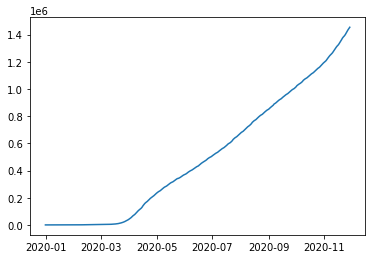

In [ ]:
import matplotlib.pyplot as plt

#plt.figure()
plt.plot(cd['date'],cd['World'])

In [ ]:
cd['days_from_start'] = (cd['date']-cd['date'][0]).dt.days

In [ ]:
cd_re = cd[['date','World','days_from_start']]

In [ ]:
cd_re

,date,World,days_from_start
0,2019-12-31,0,0
1,2020-01-01,0,1
2,2020-01-02,0,2
3,2020-01-03,0,3
4,2020-01-04,0,4
...,...,...,...
330,2020-11-25,1410788,330
331,2020-11-26,1423371,331
332,2020-11-27,1434009,332
333,2020-11-28,1444342,333


In [ ]:
x = cd_re['days_from_start'].values.reshape(-1, 1)
y = cd_re['World'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error

mse 

In [ ]:
mean_squared_error(y, regr.predict(x))

7947321540.754891

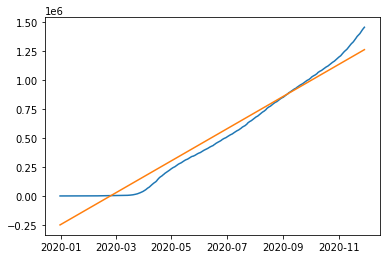

In [ ]:
plt.plot(cd['date'],cd['World'])
plt.plot(cd['date'],regr.predict(x))

In [ ]:
pd.to_numeric(cd['South Korea'],errors='coerce').fillna(0).astype(int).values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   2,   5,   7,   8,  11,  12,  13,  16,  17,  22,  28,  32,
        35,  42,  44,  50,  51,  54,  60,  66,  67,  72,  75,  75,  81,
        86,  91, 100, 103, 104, 113, 120, 126, 131, 139, 144, 152, 158,
       163, 163, 169, 174, 177, 183, 186, 192, 200, 204, 208, 208, 214,
       217, 222, 225, 229, 230, 232, 234, 236, 237, 238, 240, 240, 240,
       242, 243, 244, 246, 247, 248, 250, 250, 252, 254, 255, 256, 256,
       256, 256, 256, 258, 259, 260, 260, 262, 262, 263, 263, 263, 264,
       264, 266, 266, 267, 269, 269, 269, 269, 269, 270, 271, 272, 273,
       273, 273, 273, 273, 273, 274, 276, 276, 277, 277, 277, 277, 278,
       279, 280, 280, 280, 280, 280, 281, 281, 282, 282, 282, 28

In [ ]:
xtrain_sk = cd_re['days_from_start'][cd['date']<'2020-11-23'].values.reshape(-1, 1)
ytrain_sk = pd.to_numeric(cd['South Korea'][cd['date']<'2020-11-23'],errors='coerce').fillna(0).astype(int).values

In [ ]:
xtest_sk = cd_re['days_from_start'][cd['date']>'2020-11-22'].values.reshape(-1, 1)
ytest_sk = pd.to_numeric(cd['South Korea'][cd['date']>'2020-11-22'],errors='coerce').fillna(0).astype(int).values

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(xtrain_sk,ytrain_sk)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

mse part 2

In [ ]:
mean_squared_error(ytest_sk, regressor.predict(xtest_sk))

166.7258857142852

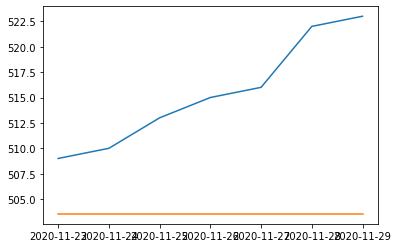

In [ ]:
plt.plot(cd['date'][cd['date']>'2020-11-22'],cd['South Korea'][cd['date']>'2020-11-22'])
plt.plot(cd['date'][cd['date']>'2020-11-22'],regressor.predict(xtest_sk))
